![Astrofisica Computacional](../../logo.PNG)

---
## 01. Animación de gráficos 3-dimensionales

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno ilustraremos como realizar animaciones a partir de graficos 3-dimensionales.

---

## Un perfil Gaussiano 2-dimensional

El siguiente código construye un perfil Gaussiano 2-dimensional utilizando una supericie con un mapa de color y un wireframe

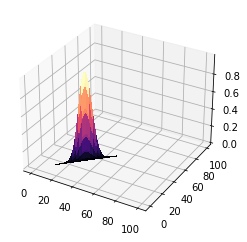

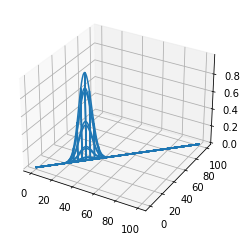

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline
 
# 2D-Gaussian Profile
def gaussian(x,y, x0=30., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))

# Initial data for the Gaussian profile
x0 = 30.
y0 = 30.


# 2-D grid
n = 200
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])

# Build the profile
for i in range(n):
    zrange[i,:] = gaussian(xrange[i], yrange, x0, y0) 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface.
surf = ax.plot_surface(xrange, yrange, zrange, cmap=cm.magma,
                       linewidth=0, antialiased=False)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface.
surf = ax.plot_wireframe(xrange, yrange, zrange, rstride=5, cstride=5)
plt.show()

### Animación

Para visualizar el movimiento del perfil se utilizará la función [matplotlib.animation.ArtistAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html). 

Para utilizar esta función, primero se crea una lista llamada `ims` en la cual se guardan las imagenes que van a combinarse en la animación. Luego, la función `ArtistAnimation` tomará estas imagenes y las combina en una animación en la cual cada frame durará 50ms.


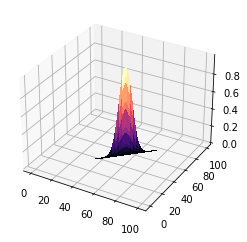

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline
 
# 2D-Gaussian Profile
def gaussian(x,y, x0=30., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))


# Initial data for the profile
x0 = 30.
y0 = 30.

# 2-D grid
n = 200
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])


# Animation
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ims = []

for t in range(25):
    # Build the profile
    for i in range(n):
        zrange[i,:] = gaussian(xrange[i], yrange, x0, y0) 
    x0 += 1.
    y0 += 1.
    
    im = ax.plot_surface(xrange, yrange, zrange, cmap=cm.magma,
                       linewidth=0, antialiased=False)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)


HTML(ani.to_jshtml())
